**In this final lab, we will model our data. Import sklearn train_test_split and separate the data.**

In [1]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
pd.set_option('display.max_columns', None)

**Load the csv. Use the variable customer_df as customer_df = pd.read_csv().**

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


**What should we do with the customer_id column?**

*We have to drop customer_id columnn as it doesn't add value to dataset. Also 'Policy Type' is redundant and the same as 'Policy'*

In [4]:
customer_df = customer_df.drop(['Customer', 'Policy Type'], axis = 1)

**Load the continuous and discrete variables into numericals_df and categorical_df variables**

In [5]:
numerical = customer_df.select_dtypes(np.number)
categorical = customer_df.select_dtypes(np.object)

C:\Users\nkhat\AppData\Local\Temp\ipykernel_19656\3522850787.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical = customer_df.select_dtypes(np.object)


**Plot every categorical variable. What can you see in the plots? Note that in the previous lab you used a bar plot to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis. However, this time you will try a different plot. This time in each plot for the categorical variable you will have, each unique category in the column on the x-axis and the target(which is numerical) on the Y-axis**

*Here it can be seen that the 'marital status' has a more normal distribution compared to the others. In terms of visualization, 'Policy' and 'Effective To Date' don't have an acceptable appearance. Therefore, bucketing can be used to group them*

In [6]:
customer_df['Policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: Policy, dtype: int64

*It can be grouped into 5 groups. values whose count is less than 1014 can be considered one group.*

In [7]:
#placing the value_counts of policy in a new dataframe to be able to define a function and group them
vals_policy = pd.DataFrame(customer_df['Policy'].value_counts())

In [8]:
vals_policy

,Policy
Personal L3,3426
Personal L2,2122
Personal L1,1240
Corporate L3,1014
Corporate L2,595
Corporate L1,359
Special L2,164
Special L3,148
Special L1,66


In [9]:
vals_policy = vals_policy.reset_index()

In [10]:
#defining 2 columns for the datafram
vals_policy.columns = ['Policy', 'Count']

In [11]:
vals_policy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Policy  9 non-null      object
 1   Count   9 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 272.0+ bytes


In [12]:
#Grouping the policies less than 1014 into one group
vals_policy_new = vals_policy[vals_policy['Count'] < 1014]

In [13]:
vals_policy_new

,Policy,Count
4,Corporate L2,595
5,Corporate L1,359
6,Special L2,164
7,Special L3,148
8,Special L1,66


In [14]:
#converting the grouped dataframe into a list to define the function
vals_policy_new = list(vals_policy_new['Policy'])


In [15]:
vals_policy_new

['Corporate L2', 'Corporate L1', 'Special L2', 'Special L3', 'Special L1']

In [16]:
#Defining the function
def policy_cleaner(x):
    if x in vals_policy_new:
        return 'other'
    else:
        return x
    


In [17]:
#Applying the function
customer_df['Policy'] = customer_df['Policy'].apply(policy_cleaner)

In [18]:
#Checking if the function works properly
customer_df['Policy'].value_counts()

Personal L3     3426
Personal L2     2122
other           1332
Personal L1     1240
Corporate L3    1014
Name: Policy, dtype: int64

In [19]:
customer_df['Policy'].unique()

array(['Corporate L3', 'Personal L3', 'other', 'Personal L1',
       'Personal L2'], dtype=object)

In [21]:
categorical['Policy'] = customer_df['Policy'] 

*Checking the values of Vehicle Class', this column also can be dealt with bucketing method as there are values with less frequency.*

In [22]:
categorical['Vehicle Class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: Vehicle Class, dtype: int64

In [23]:
vals_size = pd.DataFrame(customer_df['Vehicle Class'].value_counts())

In [24]:
vals_size

,Vehicle Class
Four-Door Car,4621
Two-Door Car,1886
SUV,1796
Sports Car,484
Luxury SUV,184
Luxury Car,163


In [25]:
vals_size = vals_size.reset_index()

In [26]:
vals_size.columns = ['Vehicle Class', 'Count']

In [27]:
vals_size_new = vals_size[vals_size['Count'] < 484]

In [28]:
vals_size_new = list(vals_size_new['Vehicle Class'])

In [29]:
def size_cleaner(x):
    if x in vals_size_new:
        return 'Luxury'
    else:
        return x

In [30]:
customer_df['Vehicle Class'] = customer_df['Vehicle Class'].apply(size_cleaner)

In [31]:
customer_df['Vehicle Class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury            347
Name: Vehicle Class, dtype: int64

In [32]:
categorical['Vehicle Class'] = customer_df['Vehicle Class']

**For the categorical data, check if there is any data cleaning that need to perform. Hint: You can use the function value_counts() on each of the categorical columns and check the representation of different categories in each column. Discuss if this information might in some way be used for data cleaning.**


In [33]:
categorical

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,other,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,other,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal L2,Offer3,Branch,Four-Door Car,Large


In [34]:
categorical['State'].value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64

In [35]:
categorical.isna().sum()

State                0
Response             0
Coverage             0
Education            0
Effective To Date    0
EmploymentStatus     0
Gender               0
Location Code        0
Marital Status       0
Policy               0
Renew Offer Type     0
Sales Channel        0
Vehicle Class        0
Vehicle Size         0
dtype: int64

*After doing the value_counts() and checking for the null values, there are no columns with null values that need to be dropped or fixed.*

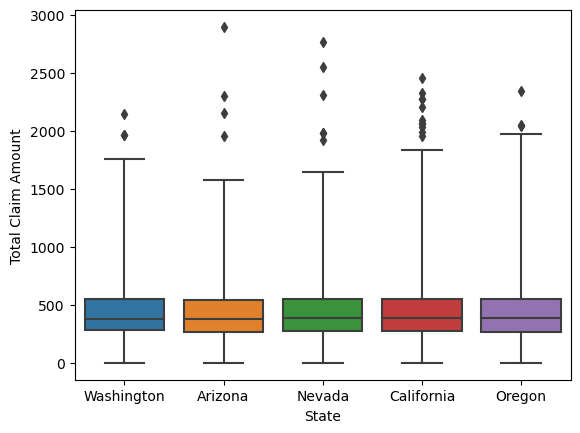

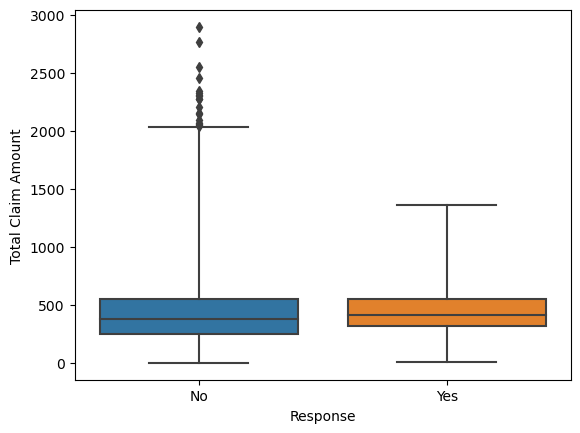

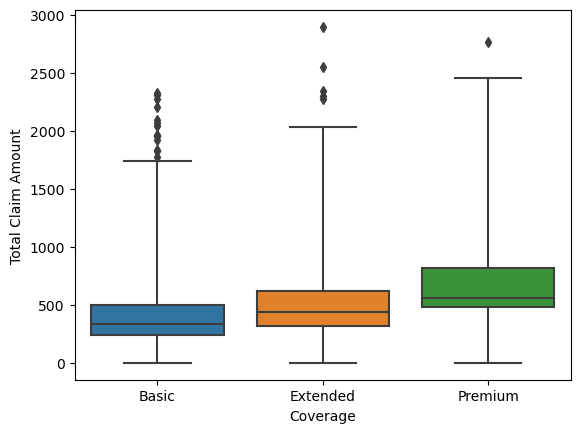

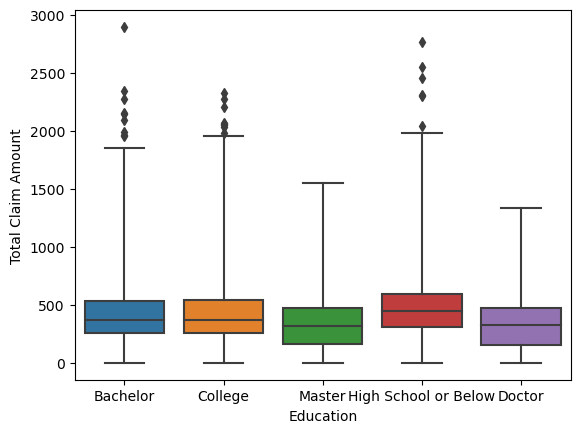

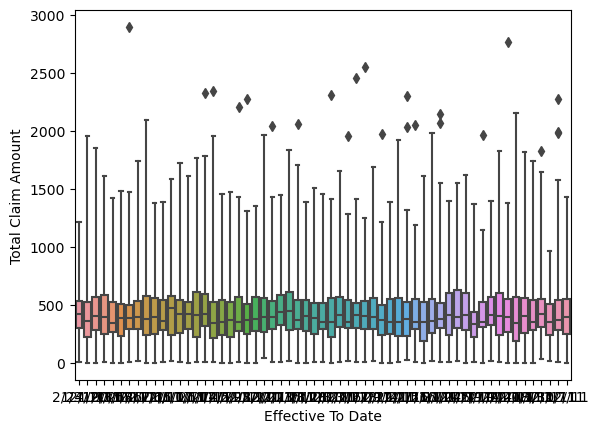

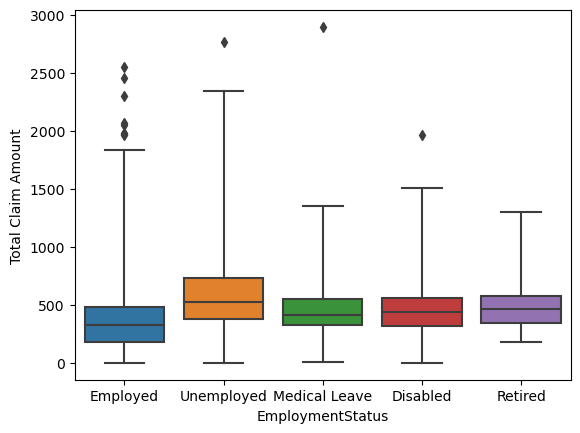

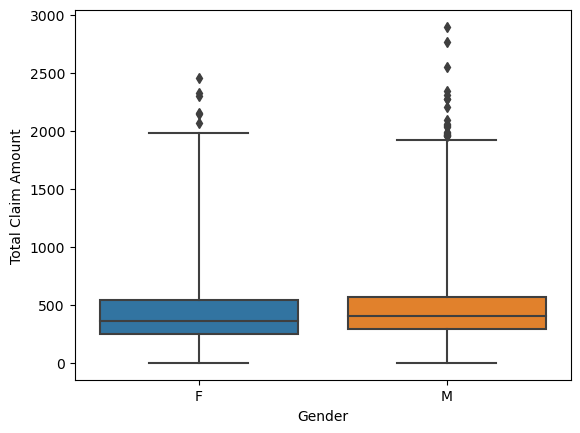

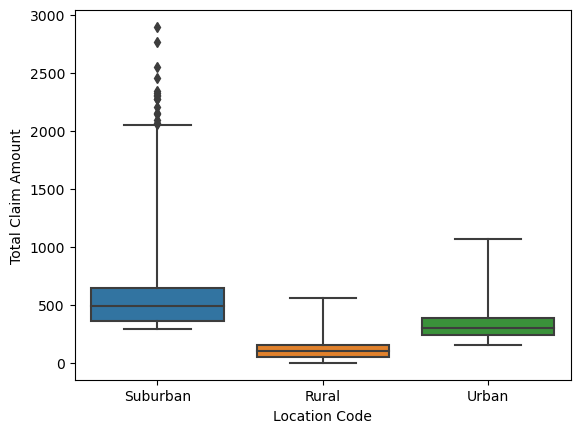

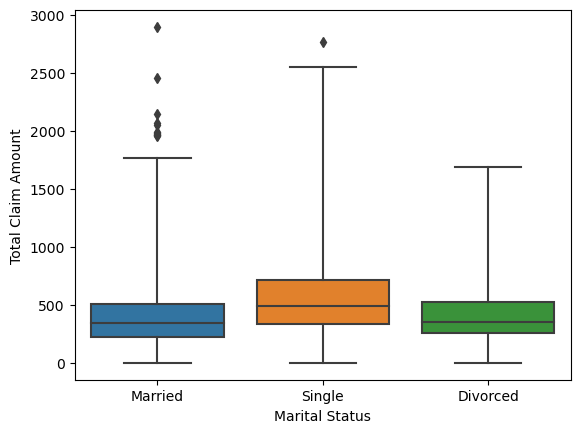

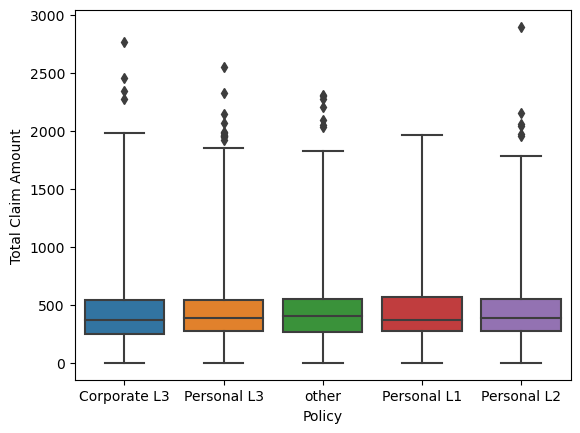

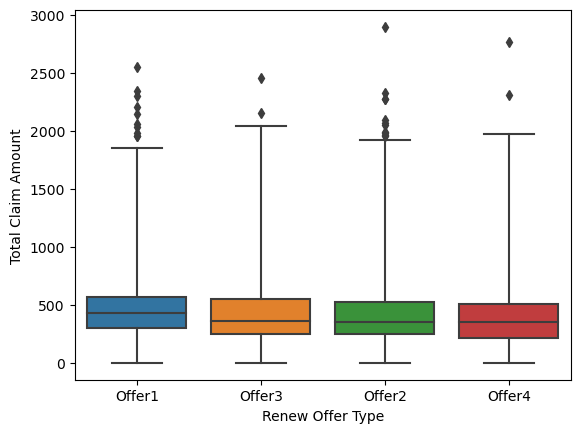

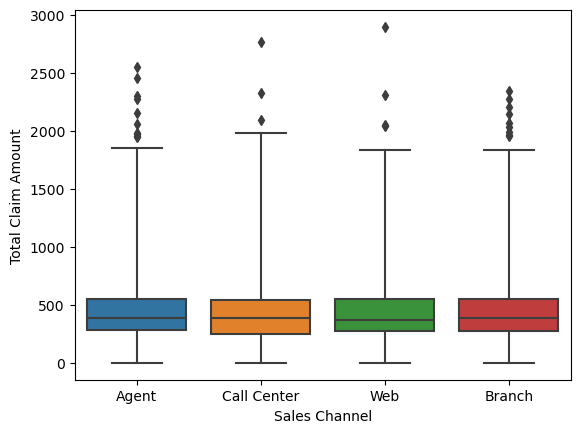

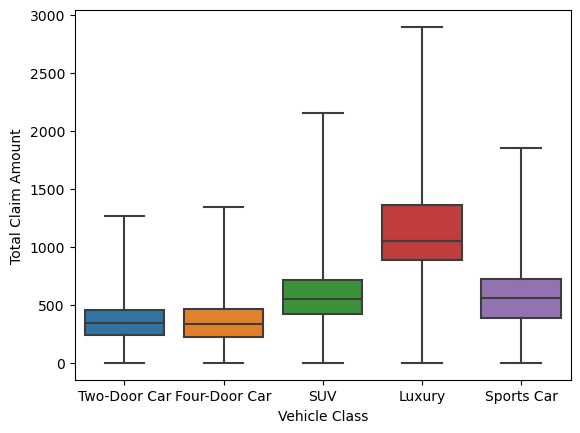

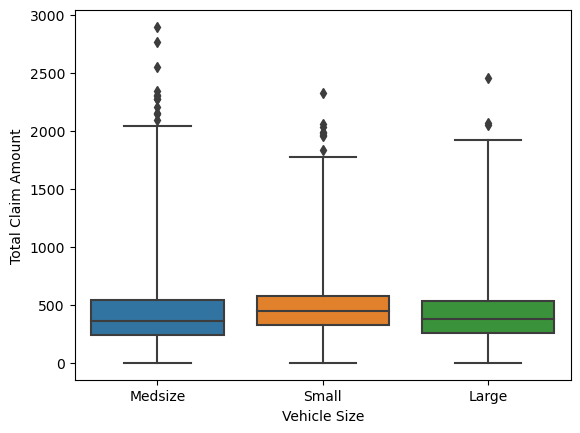

In [36]:
#Checking the outliers after bucketing some columns:
for i in categorical:
    sns.boxplot(data=customer_df, x=i, y='Total Claim Amount', whis = 5)
    plt.show()

**Summary: After checking the boxplot and bars for categorical data, it can be seen that there are some outliers in categorical columns. However, there isn't a process to deal with outliers of categorical columns as they aren't numerica values. One way, as it has been done before can be using value_counts() and bucketing the least frequent values in another group in order to have a more balanced data and less outliers when compared to the target.**

**There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?**

In [37]:
#Checking the values of 'Gender'
customer_df['Gender'].value_counts()

F    4658
M    4476
Name: Gender, dtype: int64

*As can be seen both from counting the values and the plots, gender column has approximately the same number of values and can be dropped as it won't affect the data.*

In [38]:
customer_df = customer_df.drop(['Gender'], axis = 1)

In [39]:
categorical = categorical.drop(['Gender'], axis = 1)

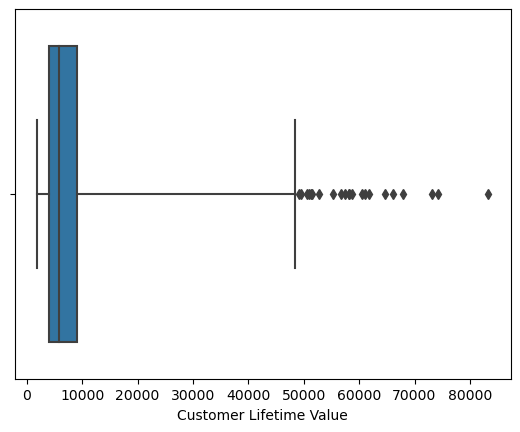

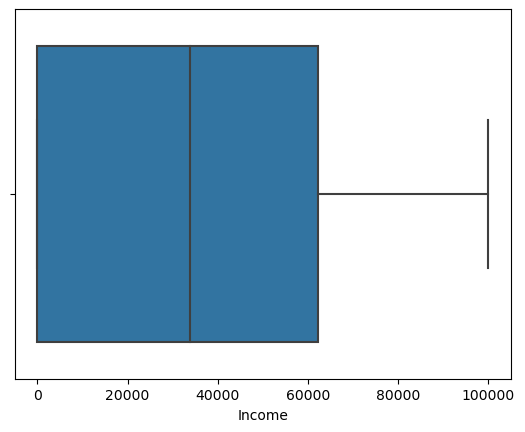

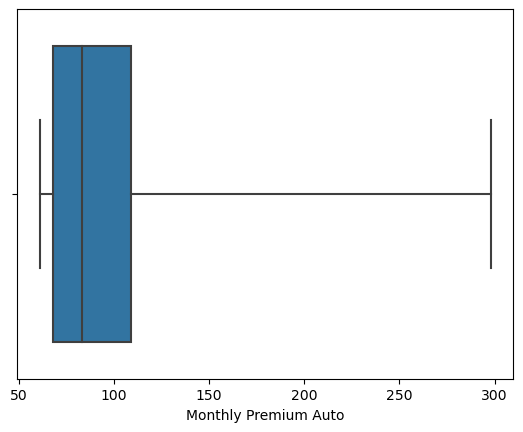

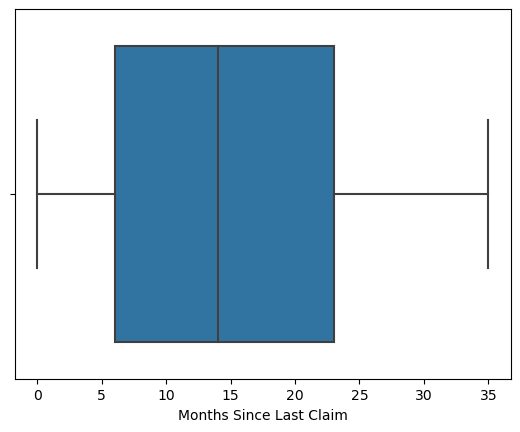

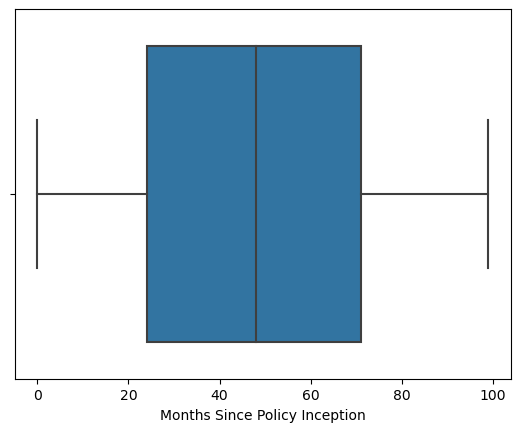

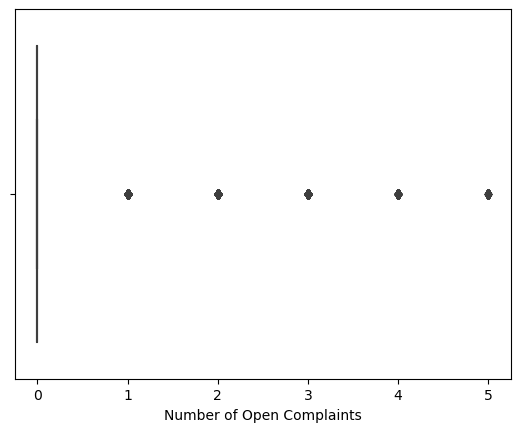

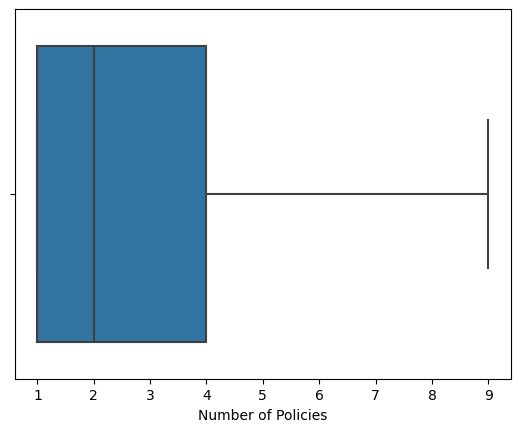

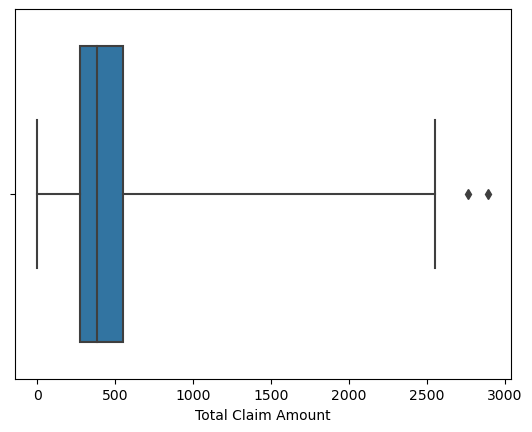

In [41]:
#Checking the outliers in numerical columns:
for i in numerical:
    sns.boxplot(data=customer_df, x=i, whis = 8)
    plt.show()

*The columns of 'Customer Lifetime Value', 'Monthly Premium Auto', 'Total Claim amount' have the highest number of outliers.*

In [42]:
#Checking the null values to see if they have been considered as outliers
customer_df.isna().sum()

State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [43]:
#Calculating the iqr
iqr = np.percentile(numerical['Customer Lifetime Value'],75) - np.percentile(numerical['Customer Lifetime Value'],25) # measuring the iqr of the column
iqr 

4967.915247000001

In [44]:
# define the limits
upper_limit = np.percentile(numerical['Customer Lifetime Value'],75) + 8*iqr
lower_limit = np.percentile(numerical['Customer Lifetime Value'],25) - 8*iqr
upper_limit, lower_limit

(48705.48901725001, -35749.07018175001)

In [45]:
len(customer_df)

9134

In [46]:
#defining the function to remove outliers:
def outliers_remover(customer_df, threshold=1.5, in_columns=numerical.columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(customer_df[column],75)
            lower = np.percentile(customer_df[column],25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            customer_df = customer_df[(customer_df[column]>lower_limit) & (customer_df[column]<upper_limit)]
    return customer_df

In [47]:
#Calling the function and changing the threshold:
customer_df1 = outliers_remover(customer_df, threshold=4, skip_columns=['Income', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies'])

In [48]:
len(customer_df1)

8862

*The number of deleted rows is 274 which isn't very high compared to the whole number of row.*

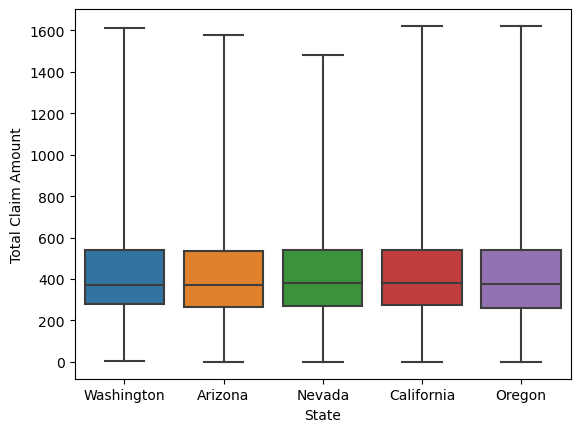

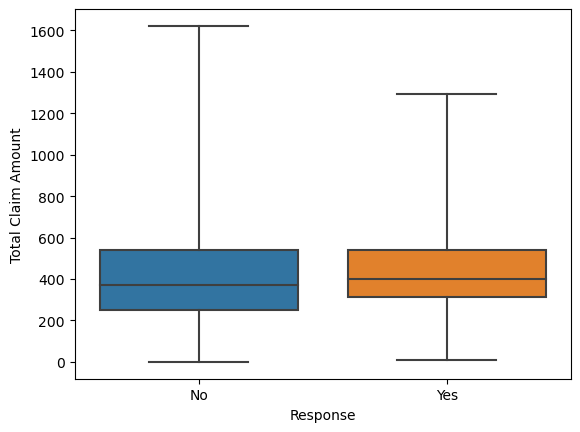

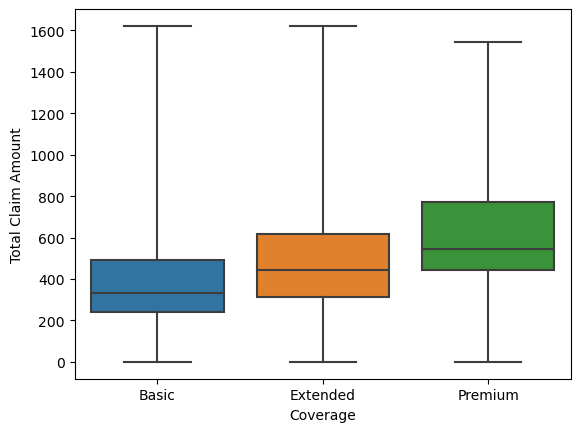

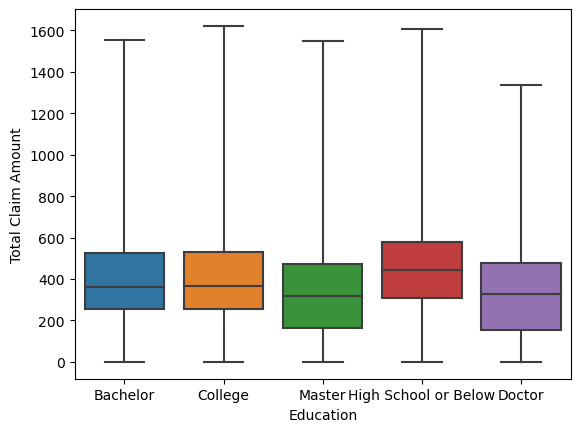

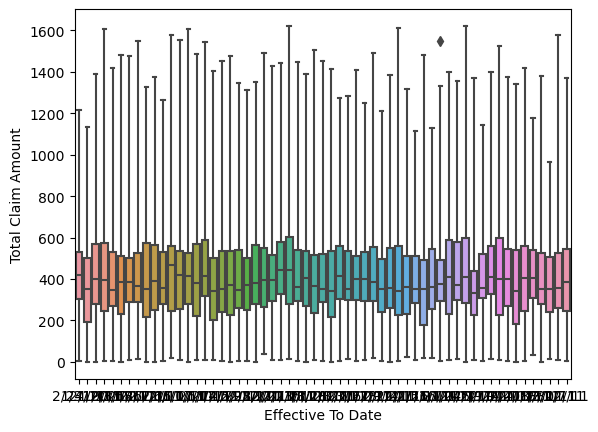

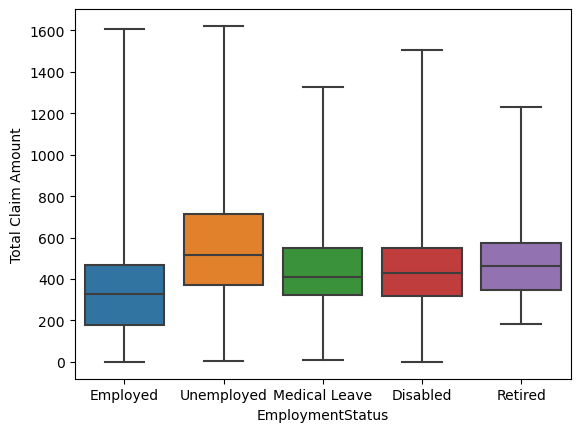

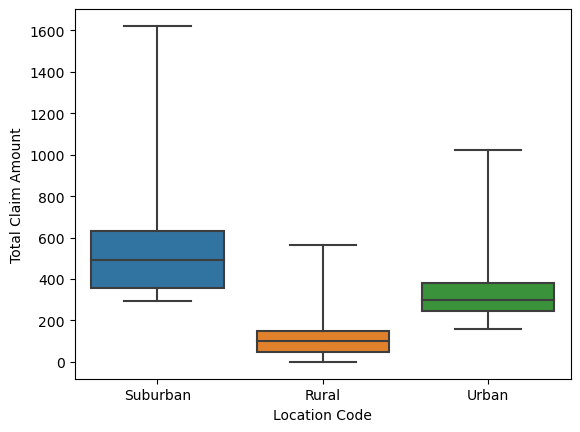

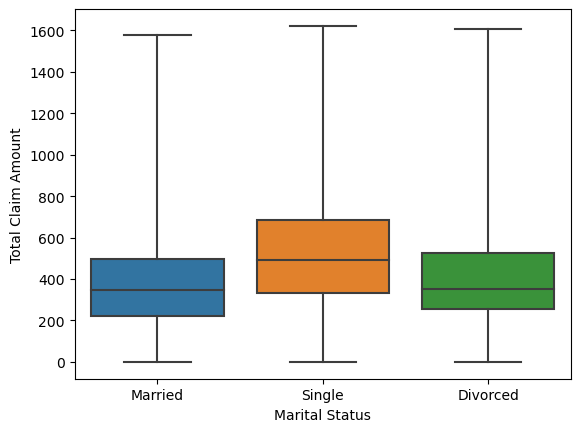

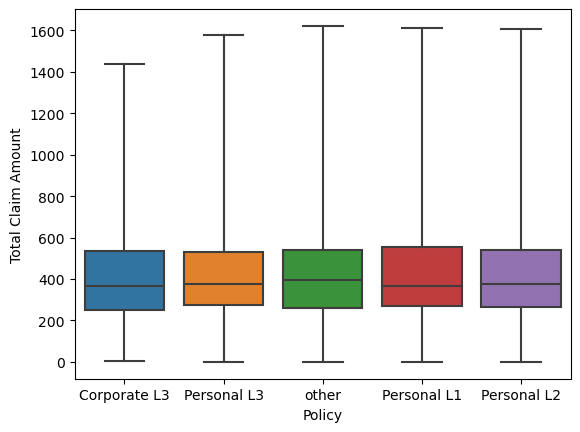

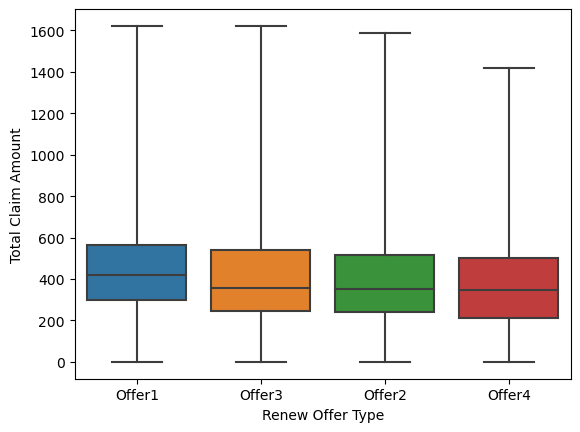

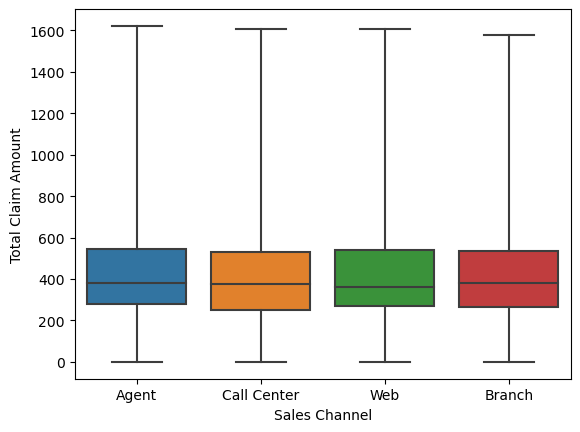

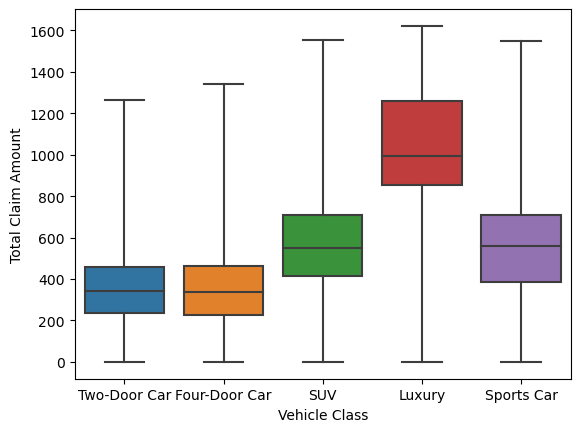

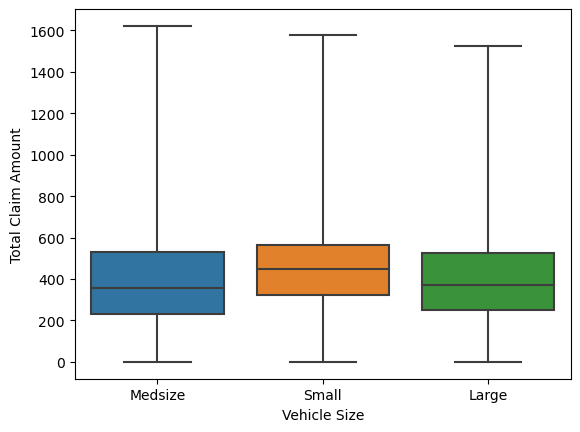

In [49]:
#Checking the outliers in categorical columns vs the numerical continous target
for i in categorical:
    sns.boxplot(data=customer_df1, x=i, y='Total Claim Amount', whis = 5)
    plt.show()

*After deleting the outliers of 'total claim amount', the categorical data looks fine in case of outliers.*

**Encode the categorical variables**

In [50]:
#encoding using ordinal encoding:
customer_df["Coverage"] = customer_df["Coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})

In [51]:
#one Hot encoding using 4 different columns
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)
columns_to_one_hot = ['State','Marital Status','Policy', 'Renew Offer Type', 'Sales Channel', 'Response', 'Vehicle Class']
encoded_array = enc.fit_transform(customer_df.loc[:,columns_to_one_hot])
categoricals_encoded = pd.DataFrame(encoded_array,columns=enc.get_feature_names_out() )
customer_df = pd.concat([customer_df,categoricals_encoded],axis=1)
customer_df.drop(labels= columns_to_one_hot,axis=1,inplace=True)
customer_df

,Customer Lifetime Value,Coverage,Education,Effective To Date,EmploymentStatus,Income,Location Code,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Vehicle Size,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_other,Renew Offer Type_Offer1,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Response_No,Response_Yes,Vehicle Class_Four-Door Car,Vehicle Class_Luxury,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car
0,2763.519279,0,Bachelor,2/24/11,Employed,56274,Suburban,69,32,5,0,1,384.811147,Medsize,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,6979.535903,1,Bachelor,1/31/11,Unemployed,0,Suburban,94,13,42,0,8,1131.464935,Medsize,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,12887.431650,2,Bachelor,2/19/11,Employed,48767,Suburban,108,18,38,0,2,566.472247,Medsize,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,7645.861827,0,Bachelor,1/20/11,Unemployed,0,Suburban,106,18,65,0,7,529.881344,Medsize,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2813.692575,0,Bachelor,2/3/11,Employed,43836,Rural,73,12,44,0,1,138.130879,Medsize,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,0,Bachelor,2/10/11,Employed,71941,Urban,73,18,89,0,2,198.234764,Medsize,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
9130,3096.511217,1,College,2/12/11,Employed,21604,Suburban,79,14,28,0,1,379.200000,Medsize,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
9131,8163.890428,1,Bachelor,2/6/11,Unemployed,0,Suburban,85,9,37,3,2,790.784983,Medsize,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
9132,7524.442436,1,College,2/3/11,Employed,21941,Suburban,96,34,3,0,3,691.200000,Large,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [52]:
customer_df['EmploymentStatus'].value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64

In [53]:
customer_df["EmploymentStatus"] = customer_df["EmploymentStatus"].map({"Employed" : 4, "Medical Leave " : 3, "Disabled" : 2, "Retired" : 1, 'Unemployed' : 0})

In [54]:
customer_df['Location Code'].value_counts()

Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64

In [55]:
customer_df["Location Code"] = customer_df["Location Code"].map({"Urban" : 3, "Rural" : 2, "Suburban" : 1})

In [56]:
customer_df['Vehicle Size'].value_counts()

Medsize    6424
Small      1764
Large       946
Name: Vehicle Size, dtype: int64

In [57]:
customer_df["Vehicle Size"] = customer_df["Vehicle Size"].map({"Large" : 3, "Medsize" : 2, "Small" : 1})

**The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.**

In [58]:
#changing the format of the column to datetime
vals_effective = pd.to_datetime(customer_df['Effective To Date'])

In [59]:
#Extracting the day data in a seperate column
customer_df['day'] = vals_effective.dt.day

In [60]:
#Extracting the month data in a seperate column
customer_df['month'] = vals_effective.dt.month

In [61]:
#Defining a function for deriving the week
def week_finder(x):
    if x <= 7:
        return 1
    elif 7<x<=14:
        return 2
    elif 14<x<21:
        return 3
    elif 21<x<=28:
        return 4
    else:
        return 5
    
    

In [62]:
#applying the function on day column and defining a new column for the week column
customer_df['week'] = customer_df['day'].apply(week_finder)

In [63]:
customer_df['week'].value_counts()

4    2219
1    2146
2    2143
3    1835
5     791
Name: week, dtype: int64

In [64]:
customer_df.head()

,Customer Lifetime Value,Coverage,Education,Effective To Date,EmploymentStatus,Income,Location Code,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Vehicle Size,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_other,Renew Offer Type_Offer1,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Response_No,Response_Yes,Vehicle Class_Four-Door Car,Vehicle Class_Luxury,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,day,month,week
0,2763.519279,0,Bachelor,2/24/11,4.0,56274,1,69,32,5,0,1,384.811147,2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,24,2,4
1,6979.535903,1,Bachelor,1/31/11,0.0,0,1,94,13,42,0,8,1131.464935,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,31,1,5
2,12887.431650,2,Bachelor,2/19/11,4.0,48767,1,108,18,38,0,2,566.472247,2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,19,2,3
3,7645.861827,0,Bachelor,1/20/11,0.0,0,1,106,18,65,0,7,529.881344,2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,20,1,3
4,2813.692575,0,Bachelor,2/3/11,4.0,43836,2,73,12,44,0,1,138.130879,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3,2,1


**Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.**

*The only column that needs to be encoded is the 'Education' column. Ordinal encoding can be used.*

In [65]:
customer_df["Education"].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64

In [66]:
#ordinal encoding
customer_df["Education"] = customer_df["Education"].map({"Doctor" : 5, "Master" : 4, "Bachelor" : 3, "College" : 2, "High School or Below": 1})

In [67]:
customer_df['Number of Policies'].value_counts()

1    3251
2    2294
3    1168
7     433
9     416
4     409
5     407
8     384
6     372
Name: Number of Policies, dtype: int64

*The number of policies and number of open complaints are not continous categories. Therefore, it can be considered a categorical columns and then can be encoded.*

In [69]:
#number of policies has already been included in policy. So it can be dropped:
customer_df = customer_df.drop(['Number of Policies', 'EmploymentStatus'], axis = 1)

*as we have extracted the required data from effective to date, this column now can be dropped. Also, gender column can be dropped like before.*

In [70]:
customer_df = customer_df.drop(['Effective To Date'], axis = 1)

In [71]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer Lifetime Value        9134 non-null   float64
 1   Coverage                       9134 non-null   int64  
 2   Education                      9134 non-null   int64  
 3   EmploymentStatus               8702 non-null   float64
 4   Income                         9134 non-null   int64  
 5   Location Code                  9134 non-null   int64  
 6   Monthly Premium Auto           9134 non-null   int64  
 7   Months Since Last Claim        9134 non-null   int64  
 8   Months Since Policy Inception  9134 non-null   int64  
 9   Number of Open Complaints      9134 non-null   int64  
 10  Total Claim Amount             9134 non-null   float64
 11  Vehicle Size                   9134 non-null   int64  
 12  State_Arizona                  9134 non-null   f

In [72]:
customer_df.head()

,Customer Lifetime Value,Coverage,Education,EmploymentStatus,Income,Location Code,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Total Claim Amount,Vehicle Size,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_other,Renew Offer Type_Offer1,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Response_No,Response_Yes,Vehicle Class_Four-Door Car,Vehicle Class_Luxury,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,day,month,week
0,2763.519279,0,3,4.0,56274,1,69,32,5,0,384.811147,2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,24,2,4
1,6979.535903,1,3,0.0,0,1,94,13,42,0,1131.464935,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,31,1,5
2,12887.431650,2,3,4.0,48767,1,108,18,38,0,566.472247,2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,19,2,3
3,7645.861827,0,3,0.0,0,1,106,18,65,0,529.881344,2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,20,1,3
4,2813.692575,0,3,4.0,43836,2,73,12,44,0,138.130879,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3,2,1


In [73]:
#Taking only the continous numerical columns:
X = customer_df[['Customer Lifetime Value', 'Income', 'Total Claim Amount']]
X

,Customer Lifetime Value,Income,Total Claim Amount
0,2763.519279,56274,384.811147
1,6979.535903,0,1131.464935
2,12887.431650,48767,566.472247
3,7645.861827,0,529.881344
4,2813.692575,43836,138.130879
...,...,...,...
9129,23405.987980,71941,198.234764
9130,3096.511217,21604,379.200000
9131,8163.890428,0,790.784983
9132,7524.442436,21941,691.200000


**Normalization of continous numericals**

In [74]:
# concatinating the normalized numerical and encoded categorical columns and discrete numerical columns
customer_df = customer_df.drop(['Customer Lifetime Value', 'Income', 'Total Claim Amount'], axis=1)
customer_df

,Coverage,Education,EmploymentStatus,Location Code,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Vehicle Size,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_other,Renew Offer Type_Offer1,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Response_No,Response_Yes,Vehicle Class_Four-Door Car,Vehicle Class_Luxury,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,day,month,week
0,0,3,4.0,1,69,32,5,0,2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,24,2,4
1,1,3,0.0,1,94,13,42,0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,31,1,5
2,2,3,4.0,1,108,18,38,0,2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,19,2,3
3,0,3,0.0,1,106,18,65,0,2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,20,1,3
4,0,3,4.0,2,73,12,44,0,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,3,4.0,3,73,18,89,0,2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,10,2,2
9130,1,2,4.0,1,79,14,28,0,2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,12,2,2
9131,1,3,0.0,1,85,9,37,3,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6,2,1
9132,1,2,4.0,1,96,34,3,0,3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3,2,1


*As in the previous lab, the numericals had a more normal appearance with cube transformation, I will use this transformation in this lab too.*

In [75]:
#Scaling the data to be used for regression
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)

In [76]:
#putting the array in the format of a dataframe
X_norm1 = pd.DataFrame(scaled,columns=X.columns)
X = X_norm1
X

,Customer Lifetime Value,Income,Total Claim Amount
0,0.010629,0.562847,0.132974
1,0.062406,0.000000,0.391051
2,0.134960,0.487763,0.195764
3,0.070589,0.000000,0.183117
4,0.011245,0.438443,0.047710
...,...,...,...
9129,0.264137,0.719547,0.068485
9130,0.014719,0.216081,0.131034
9131,0.076951,0.000000,0.273297
9132,0.069098,0.219452,0.238876


In [77]:
# concatinating the normalized numerical and encoded categorical columns and discrete numerical columns
X = pd.concat([X, customer_df], axis=1)
X

,Customer Lifetime Value,Income,Total Claim Amount,Coverage,Education,EmploymentStatus,Location Code,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Vehicle Size,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_other,Renew Offer Type_Offer1,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Response_No,Response_Yes,Vehicle Class_Four-Door Car,Vehicle Class_Luxury,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,day,month,week
0,0.010629,0.562847,0.132974,0,3,4.0,1,69,32,5,0,2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,24,2,4
1,0.062406,0.000000,0.391051,1,3,0.0,1,94,13,42,0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,31,1,5
2,0.134960,0.487763,0.195764,2,3,4.0,1,108,18,38,0,2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,19,2,3
3,0.070589,0.000000,0.183117,0,3,0.0,1,106,18,65,0,2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,20,1,3
4,0.011245,0.438443,0.047710,0,3,4.0,2,73,12,44,0,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.264137,0.719547,0.068485,0,3,4.0,3,73,18,89,0,2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,10,2,2
9130,0.014719,0.216081,0.131034,1,2,4.0,1,79,14,28,0,2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,12,2,2
9131,0.076951,0.000000,0.273297,1,3,0.0,1,85,9,37,3,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6,2,1
9132,0.069098,0.219452,0.238876,1,2,4.0,1,96,34,3,0,3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3,2,1


**Try a simple linear regression with all the data to see whether we are getting good results.**

In [78]:
#X-y split:
y = X['Total Claim Amount'] #splitting the target and other columns
X = X.drop(['Total Claim Amount'], axis=1)
X

,Customer Lifetime Value,Income,Coverage,Education,EmploymentStatus,Location Code,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Vehicle Size,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_other,Renew Offer Type_Offer1,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Response_No,Response_Yes,Vehicle Class_Four-Door Car,Vehicle Class_Luxury,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,day,month,week
0,0.010629,0.562847,0,3,4.0,1,69,32,5,0,2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,24,2,4
1,0.062406,0.000000,1,3,0.0,1,94,13,42,0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,31,1,5
2,0.134960,0.487763,2,3,4.0,1,108,18,38,0,2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,19,2,3
3,0.070589,0.000000,0,3,0.0,1,106,18,65,0,2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,20,1,3
4,0.011245,0.438443,0,3,4.0,2,73,12,44,0,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3,2,1


In [79]:
X.isna().sum()

Customer Lifetime Value            0
Income                             0
Coverage                           0
Education                          0
EmploymentStatus                 432
Location Code                      0
Monthly Premium Auto               0
Months Since Last Claim            0
Months Since Policy Inception      0
Number of Open Complaints          0
Vehicle Size                       0
State_Arizona                      0
State_California                   0
State_Nevada                       0
State_Oregon                       0
State_Washington                   0
Marital Status_Divorced            0
Marital Status_Married             0
Marital Status_Single              0
Policy_Corporate L3                0
Policy_Personal L1                 0
Policy_Personal L2                 0
Policy_Personal L3                 0
Policy_other                       0
Renew Offer Type_Offer1            0
Renew Offer Type_Offer2            0
Renew Offer Type_Offer3            0
R

In [80]:
X = X.drop(['EmploymentStatus'], axis = 1)

In [81]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42) 

In [82]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
X_train.shape

(5480, 41)

In [83]:
predictions  = model.predict(X_test)
predictions.shape

(3654,)

In [84]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)

print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)

r2 =  0.6066114681026578
RMSE =  0.061861240485008635
MSE =  0.0038268130743440714


*Comment and doubts: I am not sure if also discrete numerical columns can be used for linear regression modelling. However, when I removed them, the r2 score decreased. On the other hand, they can be considered as categoricals and enoceded. However, some columns have many values which makes them impossible for being encoded. An alternative can be using bucketing method to reduce the number of categories. However, until now, I am not sure what to do with discrete numerical columns.*

**Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.**

In [88]:
def model_finer(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42) 
    if model == 'LinearRegressor':
        from sklearn.linear_model import LinearRegression
        model = LinearRegression()
        model.fit(X_train,y_train)
        predictions  = model.predict(X_test)
    elif model == 'KNeighborsRegressor':
        from sklearn.neighbors import KNeighborsRegressor
        knn_model = KNeighborsRegressor(weights='uniform',n_neighbors=4, n_jobs = -1) # The keyword "n_neighbors" is what sets the K.
        knn_model.fit(X_train, y_train)
        predictions = knn_model.predict(X_test)
        
    from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
    r2 = r2_score(y_test, predictions)
    RMSE = mean_squared_error(y_test, predictions, squared=False)
    MSE = mean_squared_error(y_test, predictions)


    return (r2, RMSE, MSE)

**Use the function to check LinearRegressor and KNeighborsRegressor.**

In [89]:
#Calling the function: Using the function for linear regression modelling
model_finer('LinearRegressor', X, y)

(0.6066114681026578, 0.061861240485008635, 0.0038268130743440714)

In [90]:
#Calling the function: Using the function for KNN modelling
model_finer('KNeighborsRegressor', X, y)

(0.29804088101374915, 0.08263493447559472, 0.006828532395785833)

*It can be seen that r2 score in KNN modeling has reduced while MSE and RMSE have improved a bit.*

**You can check also the MLPRegressor for this task!**

In [97]:
def model_finer(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42) 
    if model == 'LinearRegressor':
        from sklearn.linear_model import LinearRegression
        model = LinearRegression()
        model.fit(X_train,y_train)
        predictions  = model.predict(X_test)
    elif model == 'KNeighborsRegressor':
        from sklearn.neighbors import KNeighborsRegressor
        knn_model = KNeighborsRegressor(weights='uniform',n_neighbors=4, n_jobs = -1) # The keyword "n_neighbors" is what sets the K.
        knn_model.fit(X_train, y_train)
        predictions = knn_model.predict(X_test)
    elif model == 'MLPRegressor':
        from sklearn.neural_network import MLPRegressor
        model = MLPRegressor(hidden_layer_sizes=(150,100,50), max_iter = 300,activation = 'relu', solver = 'adam')
        model.fit(X_train,y_train)
        predictions = model.predict(X_test)
        
    from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
    r2 = r2_score(y_test, predictions)
    RMSE = mean_squared_error(y_test, predictions, squared=False)
    MSE = mean_squared_error(y_test, predictions)


    return (r2, RMSE, MSE)

In [98]:
#Calling the function: Using the function for KNN modelling
model_finer('MLPRegressor', X, y)

(0.39114308634794803, 0.07696006004724593, 0.005922850842475698)

**Check and discuss the results.**

*Comparing the results from 3 different models, it can be seen that linear regression model has a higher r2 score compared to 2 other models. However, the RMSE score for KNN modelling looks better than the other models.*